In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [2]:
agg_data = list()
data_path = "../data/crypto-data.csv"
crypto = pd.read_csv(data_path)
crypto_ = crypto[["tradeDate", "symbol", "avg_latest"]]
crypto_ = crypto_.pivot_table(index="tradeDate", columns="symbol", values = "avg_latest")
crypto2_ = crypto_.pct_change()
crypto2_ = crypto2_[3:] # remove na

In [50]:
list(crypto2_.columns)

['1INCHBTC',
 '1INCHUSDT',
 'AAVEBKRW',
 'AAVEBNB',
 'AAVEBTC',
 'AAVEBUSD',
 'AAVEDOWNUSDT',
 'AAVEETH',
 'AAVEUPUSDT',
 'AAVEUSDT',
 'ADABKRW',
 'ADABNB',
 'ADABTC',
 'ADABUSD',
 'ADADOWNUSDT',
 'ADAETH',
 'ADAEUR',
 'ADAPAX',
 'ADATUSD',
 'ADAUPUSDT',
 'ADAUSDC',
 'ADAUSDT',
 'ADXBNB',
 'ADXBTC',
 'ADXETH',
 'AEBNB',
 'AEBTC',
 'AEETH',
 'AERGOBTC',
 'AERGOBUSD',
 'AGIBNB',
 'AGIBTC',
 'AGIETH',
 'AIONBNB',
 'AIONBTC',
 'AIONBUSD',
 'AIONETH',
 'AIONUSDT',
 'AKROBTC',
 'AKROUSDT',
 'ALGOBNB',
 'ALGOBTC',
 'ALGOBUSD',
 'ALGOPAX',
 'ALGOTUSD',
 'ALGOUSDC',
 'ALGOUSDT',
 'ALPHABNB',
 'ALPHABTC',
 'ALPHABUSD',
 'ALPHAUSDT',
 'AMBBNB',
 'AMBBTC',
 'AMBETH',
 'ANKRBNB',
 'ANKRBTC',
 'ANKRPAX',
 'ANKRTUSD',
 'ANKRUSDC',
 'ANKRUSDT',
 'ANTBNB',
 'ANTBTC',
 'ANTBUSD',
 'ANTUSDT',
 'APPCBNB',
 'APPCBTC',
 'APPCETH',
 'ARDRBNB',
 'ARDRBTC',
 'ARDRETH',
 'ARDRUSDT',
 'ARKBTC',
 'ARKETH',
 'ARNBTC',
 'ARNETH',
 'ARPABNB',
 'ARPABTC',
 'ARPAUSDT',
 'ASRBTC',
 'ASRUSDT',
 'ASTBTC',
 'ASTETH',
 'AT

In [31]:
def date_cleaner(date_series, format = "%Y-%m-%d"):
    empty_list = [None]*len(date_series)
    for i in range(len(empty_list)):
        empty_list[i] = datetime.datetime.strptime(date_series[i][:10], format)
    return empty_list


def period_return(returns_df, weights=None):
    n_dates = returns_df.shape[0]
    daily_portfolio_returns = np.zeros((n_dates,returns_df.shape[1]))
    if weights is None:
        current = np.ones(returns_df.shape[1]) # we start with 100% of funds invested
    else:
        current = weights
        
    for i in range(n_dates):
        gorc = (1+returns_df.iloc[i,:]) #gorc "growth or contraction"
        current *= gorc
        daily_portfolio_returns[i,:]=current
    return daily_portfolio_returns

In [51]:
symbols = ["BTCUSD", "ETHUSD", "ADAUSDC"]
df = crypto2_[symbols]
clean_return_history = df.reset_index(drop=True)

clean_return_history['date']=date_cleaner(crypto2_.index)
clean_return_history

start="2021-03-01"
endp1="2021-04-01"
start_date = datetime.datetime.strptime(start, "%Y-%m-%d")
endp1_date = datetime.datetime.strptime(endp1, "%Y-%m-%d")

sub_start = clean_return_history.date>=start_date
sub_end = clean_return_history.date<endp1_date
sub_index = np.logical_and(sub_start,sub_end)

pr_no_weights = period_return(clean_return_history[symbols][sub_index])
print("daily value by symbol per dollar inveested")
pr_no_weights

daily value by symbol per dollar inveested


array([[1.06258879, 1.08356184, 1.02150179],
       [1.08506241, 1.11565377, 0.97705796],
       [1.12507414, 1.14461614, 0.98701928],
       [1.10274228, 1.13081456, 0.93013424],
       [1.06479201, 1.08029476, 0.8979893 ],
       [1.08021382, 1.14962446, 0.89873674],
       [1.12030793, 1.20673985, 0.8997395 ],
       [1.1333907 , 1.25754085, 0.89946583],
       [1.20466698, 1.32673819, 0.92526187],
       [1.23562506, 1.32033852, 0.92874001],
       [1.25555554, 1.29794812, 0.89678705],
       [1.26819727, 1.28995078, 0.86122612],
       [1.31172806, 1.3325598 , 0.8699667 ],
       [1.34915037, 1.36372277, 0.86141722],
       [1.28334155, 1.30964969, 0.82981777],
       [1.23460785, 1.28968171, 0.86947104],
       [1.25227881, 1.29353908, 1.00451771],
       [1.30477142, 1.31061975, 1.09613758],
       [1.30031331, 1.30685826, 1.01131923],
       [1.31169205, 1.32897844, 1.0038641 ],
       [1.27918067, 1.29407694, 0.96155845],
       [1.2670687 , 1.27897343, 0.93654616],
       [1.

In [52]:
pr_no_weights_full_history = period_return(clean_return_history[symbols])
print("daily value by symbol per dollar inveested")
pr_no_weights_full_history

daily value by symbol per dollar inveested


array([[1.01419412, 1.01571642, 1.15664137],
       [1.02789716, 0.99200667, 1.19323568],
       [0.98607242, 0.9239924 , 1.11113941],
       [0.88837362, 0.8099975 , 1.04128335],
       [0.89726022, 0.83332853, 1.09106038],
       [0.90071582, 0.81927884, 1.15099613],
       [0.84079808, 0.75573505, 1.21081162],
       [0.84956376, 0.75851264, 1.45336894],
       [0.80764461, 0.70450828, 1.34353524],
       [0.8581941 , 0.76337828, 1.37242365],
       [0.87634481, 0.78598731, 1.3127118 ],
       [0.90866007, 0.80639154, 1.32609518],
       [0.89062386, 0.79666822, 1.24966813],
       [0.85997352, 0.7610766 , 1.20648028],
       [0.87242887, 0.80991995, 1.20748449],
       [0.90481066, 0.85015821, 1.20883172],
       [0.91537689, 0.88594794, 1.20846405],
       [0.97294279, 0.93469804, 1.24312194],
       [0.99794592, 0.93018942, 1.24779494],
       [1.01404267, 0.9144152 , 1.204865  ],
       [1.02425269, 0.908781  , 1.15708764],
       [1.0594101 , 0.93879941, 1.16883093],
       [1.

In [72]:
sub = clean_return_history[symbols]#[sub_index]
sub=sub.reset_index(drop=True)
daily_mean = np.mean(sub[1:], axis=0)
daily_std  = np.std(sub[1:], axis=0)
SR = np.sqrt(365)*daily_mean/daily_std
print("Symbol Daily Returns, STD, and Sharp Ratios")
print(daily_mean)
print(daily_std)
print(SR)

Symbol Daily Returns, STD, and Sharp Ratios
symbol
BTCUSD    -0.000232
ETHUSD     0.003591
ADAUSDC    0.006465
dtype: float64
symbol
BTCUSD     0.035063
ETHUSD     0.046185
ADAUSDC    0.054741
dtype: float64
symbol
BTCUSD    -0.126603
ETHUSD     1.485283
ADAUSDC    2.256309
dtype: float64


In [55]:
# construct portfilio
ratio = [0.3,0.3,.4]
return_values = period_return(returns_df=clean_return_history[symbols][sub_index], weights=ratio)
print("daily value by symbol per dollar*wts inve=sted")
print(return_values)



daily value by symbol per dollar*wts inve=sted
[[0.31877664 0.32506855 0.40860071]
 [0.32551872 0.33469613 0.39082318]
 [0.33752224 0.34338484 0.39480771]
 [0.33082268 0.33924437 0.3720537 ]
 [0.3194376  0.32408843 0.35919572]
 [0.32406415 0.34488734 0.3594947 ]
 [0.33609238 0.36202195 0.3598958 ]
 [0.34001721 0.37726226 0.35978633]
 [0.36140009 0.39802146 0.37010475]
 [0.37068752 0.39610156 0.37149601]
 [0.37666666 0.38938444 0.35871482]
 [0.38045918 0.38698523 0.34449045]
 [0.39351842 0.39976794 0.34798668]
 [0.40474511 0.40911683 0.34456689]
 [0.38500246 0.39289491 0.33192711]
 [0.37038235 0.38690451 0.34778842]
 [0.37568364 0.38806172 0.40180708]
 [0.39143143 0.39318592 0.43845503]
 [0.39009399 0.39205748 0.40452769]
 [0.39350762 0.39869353 0.40154564]
 [0.3837542  0.38822308 0.38462338]
 [0.38012061 0.38369203 0.37461846]
 [0.36619224 0.36765355 0.36156261]
 [0.3690612  0.36491977 0.35882356]
 [0.34888387 0.34607924 0.35224081]
 [0.35634635 0.356401   0.37577443]
 [0.36945233 0.36

In [64]:
ratio = [0.1,0.1,.1]
return_values = period_return(returns_df=clean_return_history[symbols][sub_index], weights=ratio)
print("daily value by symbol per dollar*wts inve=sted")
print(return_values)

daily value by symbol per dollar*wts inve=sted
[[0.10625888 0.10835618 0.10215018]
 [0.10850624 0.11156538 0.0977058 ]
 [0.11250741 0.11446161 0.09870193]
 [0.11027423 0.11308146 0.09301342]
 [0.1064792  0.10802948 0.08979893]
 [0.10802138 0.11496245 0.08987367]
 [0.11203079 0.12067398 0.08997395]
 [0.11333907 0.12575409 0.08994658]
 [0.1204667  0.13267382 0.09252619]
 [0.12356251 0.13203385 0.092874  ]
 [0.12555555 0.12979481 0.0896787 ]
 [0.12681973 0.12899508 0.08612261]
 [0.13117281 0.13325598 0.08699667]
 [0.13491504 0.13637228 0.08614172]
 [0.12833415 0.13096497 0.08298178]
 [0.12346078 0.12896817 0.0869471 ]
 [0.12522788 0.12935391 0.10045177]
 [0.13047714 0.13106197 0.10961376]
 [0.13003133 0.13068583 0.10113192]
 [0.13116921 0.13289784 0.10038641]
 [0.12791807 0.12940769 0.09615584]
 [0.12670687 0.12789734 0.09365462]
 [0.12206408 0.12255118 0.09039065]
 [0.1230204  0.12163992 0.08970589]
 [0.11629462 0.11535975 0.0880602 ]
 [0.11878212 0.11880033 0.09394361]
 [0.12315078 0.12

In [65]:
daily_portfolio = np.sum(return_values, axis=1)
daily_portfolio_returns = pd.Series(daily_portfolio).pct_change()#np.diff(daily_portfolio) / daily_portfolio[:-1]

daily_mean = np.mean(daily_portfolio_returns)
daily_std  = np.std(daily_portfolio_returns)
SR = np.sqrt(365)*daily_mean/daily_std
print("Portfolio Daily Returns, STD, and Sharp Ratios")
print(daily_mean)
print(daily_std)
print(SR)

Portfolio Daily Returns, STD, and Sharp Ratios
0.004656507127518616
0.02762309653947397
3.220581864570518


In [66]:
#daily_portfolio_returns[0]=0.062589

In [67]:
daily_mean = np.mean(daily_portfolio_returns)
daily_std  = np.std(daily_portfolio_returns)
SR = np.sqrt(365)*daily_mean/daily_std
print("Portfolio Daily Returns, STD, and Sharp Ratios")
print(daily_mean)
print(daily_std)
print(SR)

Portfolio Daily Returns, STD, and Sharp Ratios
0.004656507127518616
0.02762309653947397
3.220581864570518


In [73]:
# Full history calcs
ratio = [5,5,5]
return_values = period_return(returns_df=clean_return_history[symbols], weights=ratio)
print("daily value by symbol per dollar*wts inve=sted")
print(return_values)
daily_portfolio = np.sum(return_values, axis=1)
daily_portfolio_returns = pd.Series(daily_portfolio).pct_change()#np.diff(daily_portfolio) / daily_portfolio[:-1]

daily_mean = np.mean(daily_portfolio_returns)
daily_std  = np.std(daily_portfolio_returns)
SR = np.sqrt(365)*daily_mean/daily_std
print("Portfolio Daily Returns, STD, and Sharp Ratios")
print(daily_mean)
print(daily_std)
print(SR)

daily value by symbol per dollar*wts inve=sted
[[ 5.07097058  5.07858212  5.78320687]
 [ 5.1394858   4.96003335  5.9661784 ]
 [ 4.93036212  4.61996198  5.55569703]
 [ 4.44186809  4.04998752  5.20641676]
 [ 4.48630111  4.16664266  5.45530189]
 [ 4.50357912  4.09639422  5.75498063]
 [ 4.20399042  3.77867526  6.05405811]
 [ 4.24781879  3.7925632   7.26684468]
 [ 4.03822305  3.52254139  6.71767621]
 [ 4.29097052  3.81689142  6.86211824]
 [ 4.38172403  3.92993657  6.56355899]
 [ 4.54330034  4.03195772  6.6304759 ]
 [ 4.45311929  3.98334109  6.24834066]
 [ 4.29986762  3.80538302  6.03240138]
 [ 4.36214434  4.04959975  6.03742244]
 [ 4.52405332  4.25079106  6.04415862]
 [ 4.57688444  4.4297397   6.04232023]
 [ 4.86471397  4.67349019  6.21560968]
 [ 4.98972959  4.65094709  6.23897469]
 [ 5.07021333  4.57207599  6.02432501]
 [ 5.12126344  4.54390502  5.78543822]
 [ 5.2970505   4.69399707  5.84415463]
 [ 5.44817014  4.8037699   5.78672195]
 [ 5.18241941  4.61329524  5.57444708]
 [ 4.98562187  4.

## Portfolio with rebalnacing

In [155]:
rebalance_dates = [
    "2021-01-01","2021-02-01","2021-03-01",
    "2021-04-01","2021-05-01","2021-06-01",
    "2021-07-01","2021-08-01","2021-09-01",
    "2021-10-01","2021-11-01","2021-12-01",]

start="2021-02-20"
endp1="2021-08-25"
wts = np.array([0.333,0.333,1-0.666])
initial_investment = 10000

symbols = ["BTCUSD", "ETHUSD", "ADAUSDC"]
df = crypto2_[symbols]
clean_return_history = df.reset_index(drop=True)
clean_return_history['date']=date_cleaner(crypto2_.index)


#calculate portfolio returns for each period, rebalancing every rebalance_date.

return_values = period_return(returns_df=clean_return_history[symbols][sub_index], weights=ratio)

In [156]:
portfolio_rebalance_datetime = np.array([datetime.datetime.strptime(item, "%Y-%m-%d") for item in rebalance_dates])
start_date = datetime.datetime.strptime(start, "%Y-%m-%d")
endp1_date = datetime.datetime.strptime(endp1, "%Y-%m-%d")

#get valid rebalance dates
valid_rebalance_datetime = np.array(
    [rb_date for rb_date in portfolio_rebalance_datetime if start_date<rb_date and rb_date < endp1_date]
)
event_datetimes = np.insert(valid_rebalance_datetime, 0, start_date)
event_datetimes = np.append(event_datetimes,endp1_date)

total_portfolio_value = initial_investment
daily_portfolio_values = None
for i in range(len(event_datetimes)-1):
    sub_start = clean_return_history.date>=event_datetimes[i]
    sub_end = clean_return_history.date<event_datetimes[i+1]
    sub_index = np.logical_and(sub_start,sub_end)
    portfolio_values = period_return(
        returns_df=clean_return_history[symbols][sub_index], weights=total_portfolio_value*wts)
    if daily_portfolio_values is None:
        daily_portfolio_values = portfolio_values
    else:
        np.vstack((daily_portfolio_values, portfolio_values))
    
    total_portfolio_value = np.sum(portfolio_values[-1,:])
    print(total_portfolio_value)
    

9522.87682576017
11425.462972048592
13558.695655354415
12553.499244457975
11126.962072777042
12237.492384864463
19001.51499032275


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

def date_cleaner(date_series, format = "%Y-%m-%d"):
    empty_list = [None]*len(date_series)
    for i in range(len(empty_list)):
        empty_list[i] = datetime.datetime.strptime(date_series[i][:10], format)
    return empty_list


class Portfolio:
    
    def __init__(self, data, symbols, weights, initial_investment, start_date, end_date, rebalance_dates):

        self.data=data
        self.wts = weights
        self.initial_investment = initial_investment
        self.symbols = symbols
        
        self.portfolio_rebalance_datetime = np.array([datetime.datetime.strptime(item, "%Y-%m-%d") for item in rebalance_dates])
        self.start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
        self.endp1_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")
        
        #get valid rebalance dates
        valid_rebalance_datetime = np.array(
            [rb_date for rb_date in self.portfolio_rebalance_datetime if self.start_date<rb_date and rb_date < self.endp1_date]
        )
        self.event_datetimes = np.insert(valid_rebalance_datetime, 0, self.start_date)
        self.event_datetimes = np.append(self.event_datetimes, self.endp1_date)
        
    def period_return(self, returns_df, weights=None):
        n_dates = returns_df.shape[0]
        daily_portfolio_returns = np.zeros((n_dates,returns_df.shape[1]))
        if weights is None:
            current = np.ones(returns_df.shape[1]) # we start with 100% of funds invested
        else:
            current = weights
            
        for i in range(n_dates):
            gorc = (1+returns_df.iloc[i,:]) #gorc "growth or contraction"
            current *= gorc
            daily_portfolio_returns[i,:]=current
        return daily_portfolio_returns
    
    def estimate_portfolio_returns(self):
    
        self.daily_portfolio_values = np.ones((1,len(self.wts)))
        self.daily_portfolio_values[0,:] = self.initial_investment*self.wts

        for i in range(len(self.event_datetimes)-1):
            sub_start = self.data.date>=self.event_datetimes[i]
            sub_end = self.data.date<self.event_datetimes[i+1]
            sub_index = np.logical_and(sub_start,sub_end)
            
            portfolio_values = self.period_return(
                returns_df=self.data[self.symbols][sub_index], 
                weights=np.sum(self.daily_portfolio_values[-1,:])*self.wts)
            
            self.daily_portfolio_values = np.vstack((self.daily_portfolio_values, portfolio_values))
            
            self.total_portfolio_value = np.sum(self.daily_portfolio_values[-1,:])
            
    def get_sharpe_ratio(self):
        vals = np.sum(self.daily_portfolio_values, axis=1)
        daily_mean = np.mean(vals)
        daily_std  = np.std(vals)
        SR = np.sqrt(365)*daily_mean/daily_std
        return SR
    
    def get_sharpe_report(self):
        portfolio_SR = self.get_sharpe_ratio()
        daily_mean = np.mean(self.daily_portfolio_values, axis=0)
        daily_std  = np.std(self.daily_portfolio_values, axis=0)
        individual_SR = np.sqrt(365)*daily_mean/daily_std
        df = pd.DataFrame(columns=list(self.symbols))
        df.loc[0] = individual_SR
        df['Portfolio SR'] = self.get_sharpe_ratio()
        return df
    

In [99]:
rebalance_dates = [
    "2021-01-01","2021-02-01","2021-03-01",
    "2021-04-01","2021-05-01","2021-06-01",
    "2021-07-01","2021-08-01","2021-09-01",
    "2021-10-01","2021-11-01","2021-12-01",]
start="2021-02-20"
endp1="2021-08-26"
wts = np.array([1/3,1/3,1/3])
initial_investment = 10000
symbols = ["BTCUSD", "ETHUSD", "ADAUSDC"]

agg_data = list()
data_path = "../data/crypto-data.csv"
crypto = pd.read_csv(data_path)
crypto_ = crypto[["tradeDate", "symbol", "avg_latest"]]
crypto_ = crypto_.pivot_table(index="tradeDate", columns="symbol", values = "avg_latest")
crypto2_ = crypto_.pct_change()
crypto2_ = crypto2_[3:]

df = crypto2_[symbols]
clean_return_history = df.reset_index(drop=True)
clean_return_history['date']=date_cleaner(crypto2_.index)


In [100]:
portfolio_obj = Portfolio(
    data=clean_return_history, 
    symbols=symbols, 
    weights=wts, 
    initial_investment=initial_investment,
    start_date=start,
    end_date=endp1, 
    rebalance_dates=rebalance_dates)

In [101]:
portfolio_obj.estimate_portfolio_returns()
print(portfolio_obj.get_sharpe_ratio())

105.67778907898845


In [102]:
portfolio_obj.get_sharpe_report()

,BTCUSD,ETHUSD,ADAUSDC,Portfolio SR
0,148.691999,95.900398,63.672101,105.677789


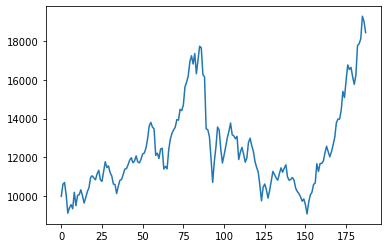

In [103]:
plt.plot(np.sum(portfolio_obj.daily_portfolio_values, axis=1))

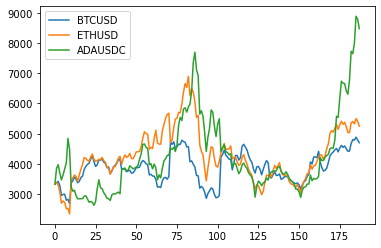

In [104]:
for i in range(len(symbols)):
    plt.plot(portfolio_obj.daily_portfolio_values[:,i], label=symbols[i])
plt.legend()